Task 1

Missing values:
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


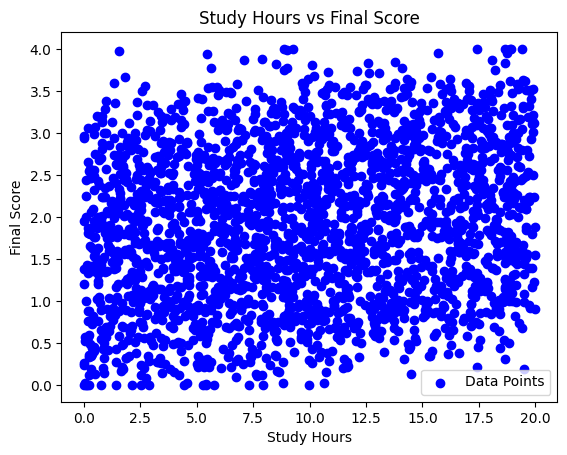

Linear Regression - Mean Squared Error: 0.820746738998584
Linear Regression - R^2 Score: 0.007480506788430263


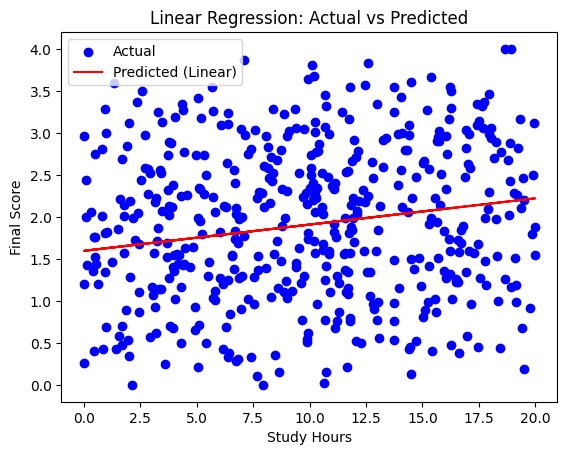

Polynomial Regression - Mean Squared Error: 0.8206768802821816
Polynomial Regression - R^2 Score: 0.00756498612231693


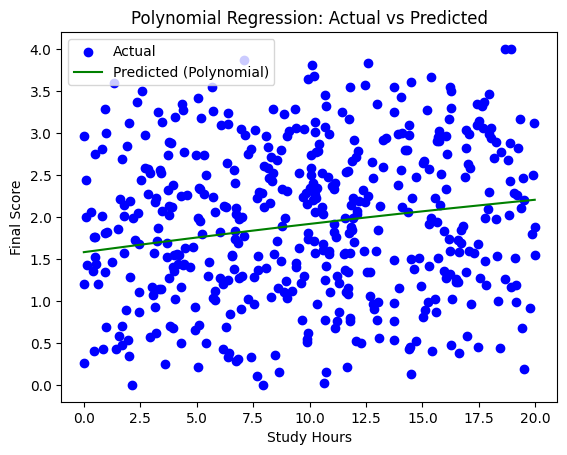


Model Comparison:
Linear Regression - MSE: 0.82, R^2: 0.01
Polynomial Regression - MSE: 0.82, R^2: 0.01


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score



data = pd.read_csv('/content/Student_performance_data _.csv')


print("Missing values:\n", data.isnull().sum())


data = data.dropna()


X = data[['StudyTimeWeekly']].values
y = data['GPA'].values


plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.title('Study Hours vs Final Score')
plt.legend()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression - Mean Squared Error:", lr_mse)
print("Linear Regression - R^2 Score:", lr_r2)


plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', label='Predicted (Linear)')
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)


y_pred_poly = polyreg.predict(X_test)


poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
print("Polynomial Regression - Mean Squared Error:", poly_mse)
print("Polynomial Regression - R^2 Score:", poly_r2)


X_sorted = np.sort(X_test, axis=0)
y_pred_poly_sorted = polyreg.predict(X_sorted)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_sorted, y_pred_poly_sorted, color='green', label='Predicted (Polynomial)')
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.legend()
plt.show()


print("\nModel Comparison:")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R^2: {lr_r2:.2f}")
print(f"Polynomial Regression - MSE: {poly_mse:.2f}, R^2: {poly_r2:.2f}")

Task 2

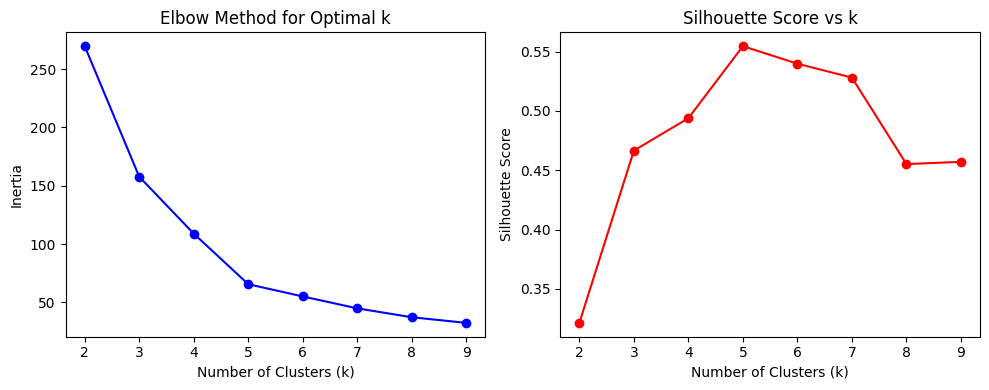

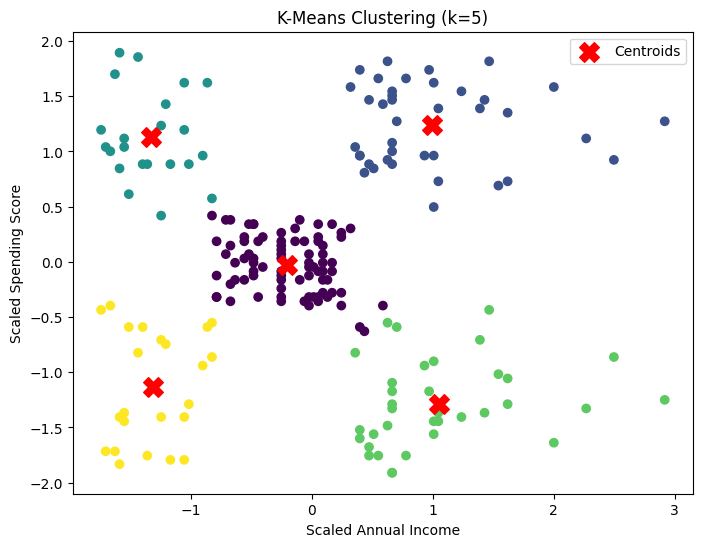

K-Means Cluster Summary:
                 Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                            
0                            55.30                   49.52
1                            86.54                   82.13
2                            25.73                   79.36
3                            88.20                   17.11
4                            26.30                   20.91


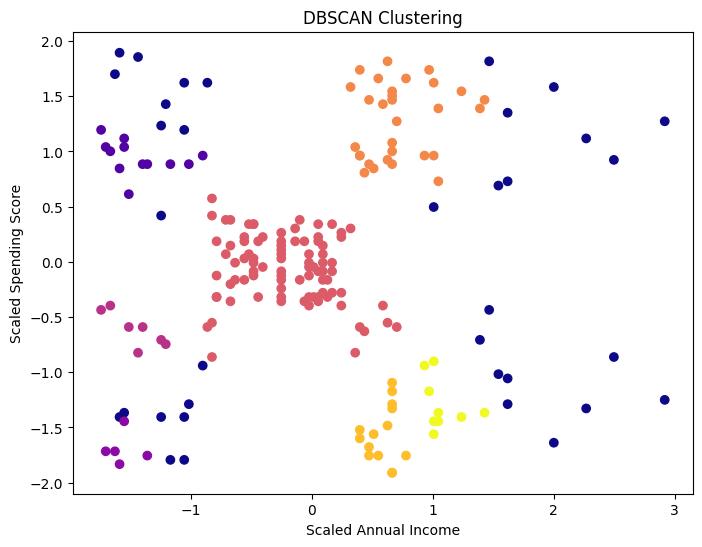

DBSCAN Cluster Summary:
                 Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                           70.60                   51.66
 0                           23.17                   74.58
 1                           19.60                    6.60
 2                           22.43                   34.43
 3                           55.23                   48.58
 4                           79.53                   83.13
 5                           75.93                   10.07
 6                           88.78                   17.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

data = pd.read_csv('/content/Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.tight_layout()
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('K-Means Clustering (k=5)')
plt.legend()
plt.show()

data['KMeans_Cluster'] = kmeans_labels
cluster_summary = data.groupby('KMeans_Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(2)
print("K-Means Cluster Summary:\n", cluster_summary)



dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)



plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='plasma')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('DBSCAN Clustering')
plt.show()




data['DBSCAN_Cluster'] = dbscan_labels
dbscan_summary = data.groupby('DBSCAN_Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(2)
print("DBSCAN Cluster Summary:\n", dbscan_summary)

Task 3

Dataset Shape: (581012, 54)
Target Distribution:
 Cover_Type
1    0.487599
0    0.364605
2    0.061537
6    0.035300
5    0.029891
4    0.016339
3    0.004728
Name: proportion, dtype: float64

First 5 rows of features:
    Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1      

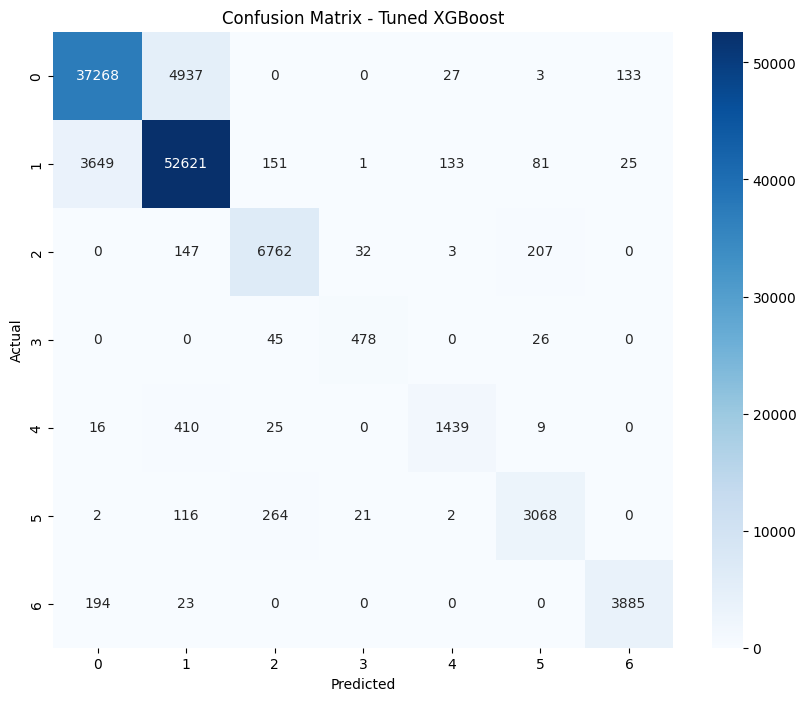

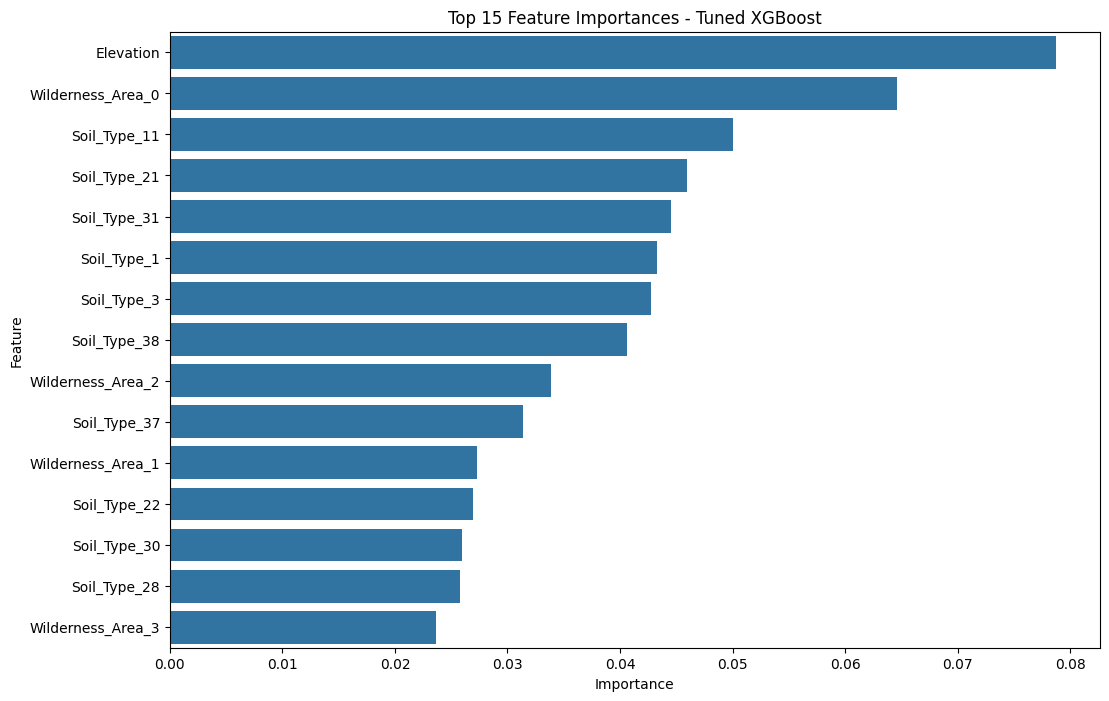

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


np.random.seed(42)


dataset_path = '/content/covtype.data.gz'


columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'] + \
    [f'Wilderness_Area_{i}' for i in range(4)] + \
    [f'Soil_Type_{i}' for i in range(40)] + ['Cover_Type']


data = pd.read_csv(dataset_path, header=None, names=columns)


X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type'] - 1


print("Dataset Shape:", X.shape)
print("Target Distribution:\n", y.value_counts(normalize=True))
print("\nFirst 5 rows of features:\n", X.head())
print("\nMissing Values:", X.isnull().sum().sum())


scaler = StandardScaler()
X.iloc[:, :10] = scaler.fit_transform(X.iloc[:, :10])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))


xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("\nXGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_y_pred))


print("\nModel Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")



param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3]
}
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_
best_xgb_y_pred = best_xgb_model.predict(X_test)
best_xgb_accuracy = accuracy_score(y_test, best_xgb_y_pred)
print("\nBest XGBoost Accuracy after Tuning:", best_xgb_accuracy)
print("Best Parameters:", grid_search.best_params_)



cm = confusion_matrix(y_test, best_xgb_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.title('Confusion Matrix - Tuned XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



feature_importance = pd.Series(best_xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:15]
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Top 15 Feature Importances - Tuned XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Task 4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


dataset_path = '/content/loan_approval_dataset.csv'



df = pd.read_csv(dataset_path, encoding='utf-8', delimiter=',')



df.columns = df.columns.str.strip()



print("Available columns:", df.columns.tolist())
print("\nFirst few rows:\n", df.head())


if 'loan_id' in df.columns:
    df = df.drop('loan_id', axis=1)



numeric_cols = ['income_annum', 'loan_amount', 'residential_assets_value',
                'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
for col in numeric_cols:
    df[col] = df[col].replace(',', '').astype(float)



le = LabelEncoder()
for col in ['education', 'self_employed', 'loan_status']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Error: '{col}' column not found. Check column names.")



if 'loan_status' in df.columns:
    print("\nClass distribution:\n", df['loan_status'].value_counts(normalize=True))



    X = df.drop('loan_status', axis=1)
    y = df['loan_status']



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



    def train_evaluate(model, X_train, y_train, X_test, y_test, model_name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"\n{model_name} Performance:")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred, target_names=['Approved', 'Rejected']))



    lr = LogisticRegression(max_iter=1000, random_state=42)
    train_evaluate(lr, X_train, y_train, X_test, y_test, "Logistic Regression")



    dt = DecisionTreeClassifier(random_state=42)
    train_evaluate(dt, X_train, y_train, X_test, y_test, "Decision Tree")



    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


    lr_smote = LogisticRegression(max_iter=1000, random_state=42)
    train_evaluate(lr_smote, X_train_smote, y_train_smote, X_test, y_test, "Logistic Regression with SMOTE")



    dt_smote = DecisionTreeClassifier(random_state=42)
    train_evaluate(dt_smote, X_train_smote, y_train_smote, X_test, y_test, "Decision Tree with SMOTE")
else:
    print("Cannot proceed: 'loan_status' column is required for prediction.")

Available columns: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']

First few rows:
    loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     